In [10]:
import numpy as np
import matplotlib
from matplotlib.ticker import MaxNLocator, FixedLocator, LinearLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Ellipse
import matplotlib.cm as cm
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.offsetbox import AnchoredText

font0 = FontProperties()
font = font0.copy()
font.set_size(24)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')

legendfont=font0.copy()
legendfont.set_size(16)
legendfont.set_weight('bold')

### Oscillation analysis with oscillated backgrounds

This notebook performs and plots the results of our oscillation analysis for MicroBooNE.
We work with appearance only, and fix the oscillation backgrounds.

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
from MicroTools import *
from MicroTools.plot_tools import *

In [13]:
MuBAppDisT0 = np.load(f"{path_osc_data}/FullAnalysis_AppDis_SSq2ME_SSq2MM.npy", allow_pickle=True)
PVs = np.load(f"{path_osc_data}/Dm41_SSq2ME_SSq2MM_PVs.npy", allow_pickle=True)
dm41VecT = PVs[0]
MEVec = PVs[1]
MVec = PVs[2]

MuBAppDisT = (np.asarray(MuBAppDisT0.T[0])).reshape(len(dm41VecT), len(MEVec), len(MVec))
MuBAppDisTAs = (np.asarray(MuBAppDisT0.T[1])).reshape(len(dm41VecT), len(MEVec), len(MVec))

In [14]:
MargM = [[np.min([MuBAppDisT[dm41II][Ue4SqII][Um4SqII] for Um4SqII in range(len(MVec))]) for Ue4SqII in range(len(MEVec))] for dm41II in range(len(dm41VecT))]
MargME = [[np.min([MuBAppDisT[dm41II][Ue4SqII][Um4SqII] for Ue4SqII in range(len(MEVec))]) for Um4SqII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

def FixUm4T(MII):
    return [[MuBAppDisT[dm41II][EII][MII] for EII in range(len(MEVec))] for dm41II in range(len(dm41VecT))]
def FixMET(EII):
    return [[MuBAppDisT[dm41II][EII][MII] for MII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

In [15]:
MargMAs = [[np.min([MuBAppDisTAs[dm41II][Ue4SqII][Um4SqII] for Um4SqII in range(len(MVec))]) for Ue4SqII in range(len(MEVec))] for dm41II in range(len(dm41VecT))]
MargMEAs = [[np.min([MuBAppDisTAs[dm41II][Ue4SqII][Um4SqII] for Ue4SqII in range(len(MEVec))]) for Um4SqII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

def FixUm4TAs(MII):
    return [[MuBAppDisTAs[dm41II][EII][MII] for EII in range(len(MEVec))] for dm41II in range(len(dm41VecT))]
def FixMETAs(EII):
    return [[MuBAppDisTAs[dm41II][EII][MII] for MII in range(len(MVec))] for dm41II in range(len(dm41VecT))]

In [16]:
OPERA = np.loadtxt(f"{path_osc_app}/dm41s22thmue-opera.dat")
KARMEN = np.loadtxt(f"{path_osc_app}/dm41s22thmue-karmen.dat")
SBN = np.loadtxt(f"{path_osc_app}/SBN_3sigma.csv", delimiter=",")

KARMENY = 10**np.unique(np.transpose(KARMEN)[0])
KARMENX = 10**np.unique(np.transpose(KARMEN)[1])
KARMENZ = (np.transpose(KARMEN)[2]).reshape(len(KARMENY), len(KARMENX))

OPERAY = 10**np.unique(np.transpose(OPERA)[0])
OPERAX = 10**np.unique(np.transpose(OPERA)[1])
OPERAZ = (np.transpose(OPERA)[2]).reshape(len(OPERAY), len(OPERAX))

MB1S = np.loadtxt(f"{path_osc_app}/MB_BkgOsc_1S.csv", delimiter=",")
MB2S1 = np.loadtxt(f"{path_osc_app}/MB_BkgOsc_2S_1.csv", delimiter=",")
MB2S2 = np.loadtxt(f"{path_osc_app}/MB_BkgOsc_2S_2.csv", delimiter=",")
MB2S3 = np.loadtxt(f"{path_osc_app}/MB_BkgOsc_2S_3.csv", delimiter=",")
MB2S4 = np.loadtxt(f"{path_osc_app}/MB_BkgOsc_2S_4.csv", delimiter=",")
MB3S = np.loadtxt(f"{path_osc_app}/MB_BkgOsc_3S.csv", delimiter=",")

In [17]:
NC = 55
MargMTrim = MargM[NC:len(dm41VecT)]

NCAs = 100
MargMTrimAs = MargMAs[NCAs:len(dm41VecT)]

# Comparing with latest MicroBooNE result

In [20]:
sin2t, dm2 = np.genfromtxt("MicroTools/MicroOscData/sinThetaEMu_profiled.dat", unpack=True)

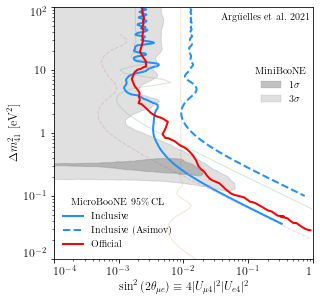

In [35]:
from MicroTools.plot_tools import *
CRITICAL_CHI2 = 5.99
fig, ax = std_fig(figsize=(std_figsize[0], std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-2, 1e2

ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu e}\right)\equiv 4|U_{\mu 4}|^2 |U_{e4}|^2$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1, 10, 100)))
ax.tick_params(direction='out')
ax.tick_params(direction='out', which='minor')
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"))
ax.set_yticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"))

####################
# plot data

levs = [np.min(MargMTrim) +  CRITICAL_CHI2]
ax.contour(MEVec, dm41VecT[NC:], MargMTrim, levels=levs, linestyles=['-'], colors=['dodgerblue'], linewidths=2)

levsAs = [np.min(MargMTrimAs) +  CRITICAL_CHI2]
ax.contour(MEVec, dm41VecT[NCAs:], MargMTrimAs, levels=levs, linestyles=['--'], colors=['dodgerblue'], linewidths=2)

ax.plot(SBN.T[0], SBN.T[1], color='mediumvioletred', ls='--', lw=1, zorder=0, alpha=0.2)
ax.contour(KARMENX, KARMENY, KARMENZ, levels=[np.min(KARMENZ)+ CRITICAL_CHI2], colors='forestgreen', linestyles='-', linewidths=1, zorder=0, alpha=0.2)
ax.contour(OPERAX, OPERAY, OPERAZ, levels=[np.min(OPERAZ)+ CRITICAL_CHI2], colors='darkgoldenrod', linestyles='-', linewidths=1, zorder=0, alpha=0.2)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='dodgerblue', label=r"{Inclusive}")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, ls='--', color='dodgerblue', label=r"{Inclusive\ (Asimov)}")
#ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=2, color='coral', label=r"{CCQE}")

ax.fill_between(MB1S.T[0], MB1S.T[1], np.zeros(len(MB1S)), color='#333333', alpha=0.3, zorder=1, interpolate=True)
ax.fill_betweenx(MB3S.T[1], MB3S.T[0], np.zeros(len(MB3S)), color='#999999', alpha=0.3, zorder=1, interpolate=True)
ax.plot(MB1S.T[0], MB1S.T[1], color='#CCCCCC', lw=0.25)
ax.plot(MB3S.T[0], MB3S.T[1], color='#CCCCCC', lw=0.25)

colors=['#333333', '#999999']
labels=[r'$1\sigma$', r'$3\sigma$']


order = np.argsort(dm2)
plt.plot(sin2t[order], dm2[order], lw=2, color='red', label='Official')

#########
# labels and legens 
#proxy = [plt.Rectangle((0,0),1,1,fc =colors[i], ec='black', label=labels[i], alpha=0.3, lw=0.25) for i in range(3)]
proxy = [plt.Rectangle((0,0),1,1,fc =colors[i], ec='black', label=labels[i], alpha=0.3, lw=0.25) for i in range(2)]
leg2 = ax.legend(proxy, labels, fontsize=fsize_annotate, title=r"MiniBooNE", loc=(0.76,0.6))
leg1 = ax.legend(loc='lower left', title=r"MicroBooNE $95\%\,$CL", title_fontsize = fsize_annotate, frameon=False)
plt.gca().add_artist(leg2)


ax.annotate(r"Arg\"{u}elles\ et\ al.\ 2021", xy=(xmax, ymax), xytext=(-3, -6), textcoords="offset points", ha="right", va="top", size=fsize_annotate, color='k')

keyargs = {'textcoords': "data", 'ha': "left", 'va':"bottom", 'size': fsize_annotate}

#ax.annotate(r"SBN $3\sigma$", xy=(1e-3,0.24), color='mediumvioletred', rotation=-28, **keyargs)
#ax.annotate(r"OPERA $3\sigma$", xy=(1.25e-2, 2.2e-2), color="darkgoldenrod", **keyargs)
#ax.annotate(r"KARMEN $3\sigma$", xy=(1.8e-3,0.47), color="forestgreen", rotation=-28, **keyargs)
flushalign(ax)

# save figure
fig.savefig(f"{path_plots}/Fig5/Fig_5_v2.pdf", bbox_inches='tight')
